In [1]:
%matplotlib widget

import os
import sys
import matplotlib.pyplot as plt
from IPython import embed

sys.path.append(os.path.abspath("/develop/code/evaluation"))
import evaluation_3 as eval

path_results = "/develop/results/spie_journal_2023"

Using MPI version 4.0, 1 processes


Global seed set to 1337


## 1. Evaluate loss.

In [ ]:
exp_name = "big_data"

folder_path = os.path.join(path_results, exp_name) # first experiment using entire dataset. thermo always on. phase, then der, then nf
res_0 = eval.gather_loss(folder_path + "_0")
res_1 = eval.gather_loss(folder_path + "_1")
res_2 = eval.gather_loss(folder_path + "_2")

In [ ]:
eval.plot_loss(res_0['loss'], res_1['loss'], res_2['loss'], res_2['loss'], title=exp_name, rect=[0,0,0.98,1], save_fig=True)

In [ ]:
exp_name = "all_on" # all loss turned on equally.

folder_path = os.path.join(path_results, exp_name)
res_0 = eval.gather_loss(folder_path)
# res_1 = eval.gather_loss(folder_path + "_1")
# res_2 = eval.gather_loss(folder_path + "_2")

eval.plot_loss(res_0['loss'], res_0['loss'], res_0['loss'], res_0['loss'], title=exp_name, save_fig=True)

In [ ]:
exp_name = "phase_and_der_then_recon" # minimized phase and der equally at the same time, then turned off encoder and trained recon alone

folder_path = os.path.join(path_results, exp_name)
res_0 = eval.gather_loss(folder_path + "_0")
res_1 = eval.gather_loss(folder_path + "_1")
#res_2 = eval.gather_loss(folder_path + "_2")

eval.plot_loss(res_0['loss'], res_0['loss'], res_1['loss'], res_1['loss'], title=exp_name, save_fig=True)

In [ ]:
# let phase == 1, der == 5, recon == 1 two-stage

exp_name = "phase_and_der_unequal_weight_multi"

folder_path = os.path.join(path_results, exp_name)
res_0 = eval.gather_loss(folder_path + "_0")
res_1 = eval.gather_loss(folder_path + "_1")
#res_2 = eval.gather_loss(folder_path + "_2")

eval.plot_loss(res_0['loss'], res_0['loss'], res_1['loss'], res_1['loss'], title=exp_name, save_fig=True)

In [ ]:
# let phase and der == 5, recon == 1, all at the same time

exp_name = "phase_and_der_unequal_weight"

folder_path = os.path.join(path_results, exp_name)
res_0 = eval.gather_loss(folder_path + "_0")
#res_1 = eval.gather_loss(folder_path + "_1")
#res_2 = eval.gather_loss(folder_path + "_2")

eval.plot_loss(res_0['loss'], res_0['loss'], res_0['loss'], res_0['loss'], title=exp_name, save_fig=True)

In [ ]:
exp_name = "no_learning"

folder_path = os.path.join(path_results, exp_name)
res_0 = eval.gather_loss(folder_path)
# res_1 = eval.gather_loss(folder_path + "_1")
# res_2 = eval.gather_loss(folder_path + "_2")

eval.plot_loss(res_0['loss'], res_0['loss'], res_0['loss'], res_0['loss'], title=exp_name, save_fig=True)

In [ ]:
# leave thermo off for entire training. first phase, then der, then nf
exp_name = "no_thermo"

folder_path = os.path.join(path_results, exp_name)
res_0 = eval.gather_loss(folder_path + "_0")
res_1 = eval.gather_loss(folder_path + "_1")
res_2 = eval.gather_loss(folder_path + "_2")

eval.plot_loss(res_0['loss'], res_1['loss'], res_2['loss'], res_2['loss'], title=exp_name, save_fig=True)

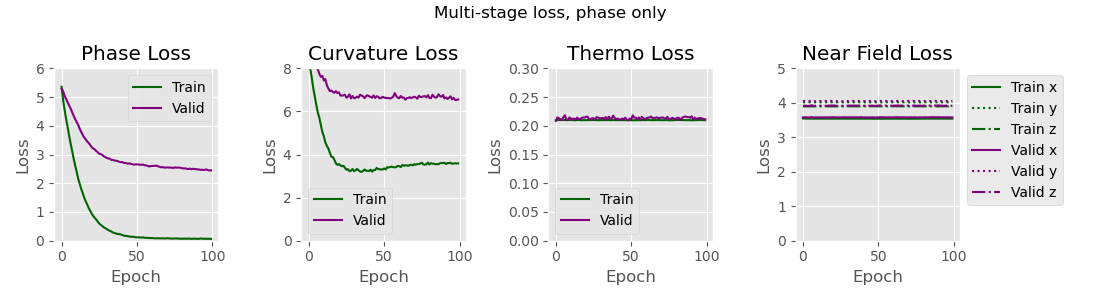

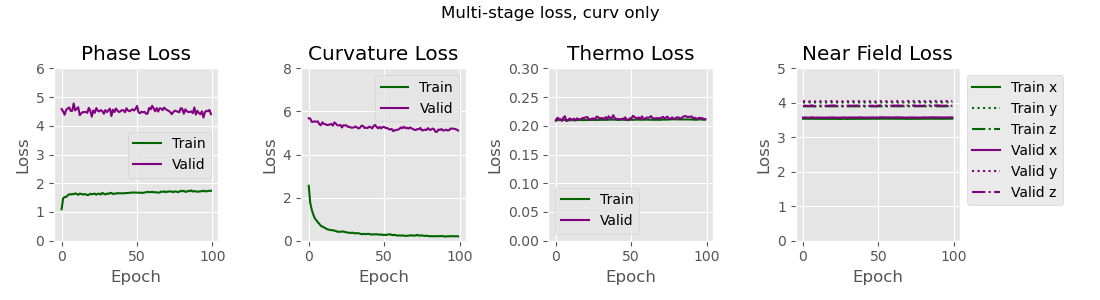

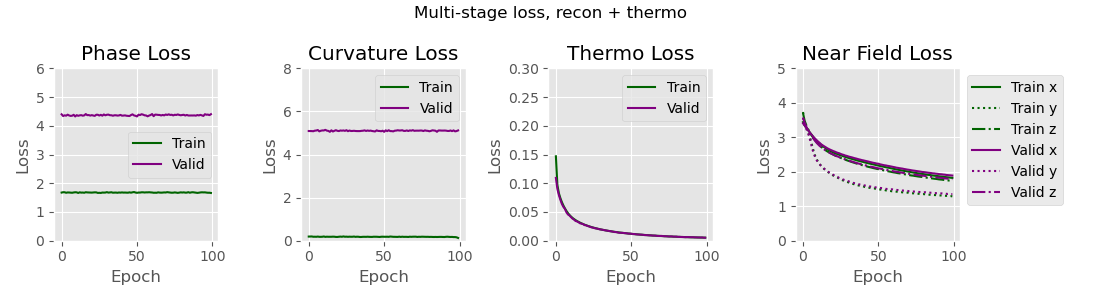

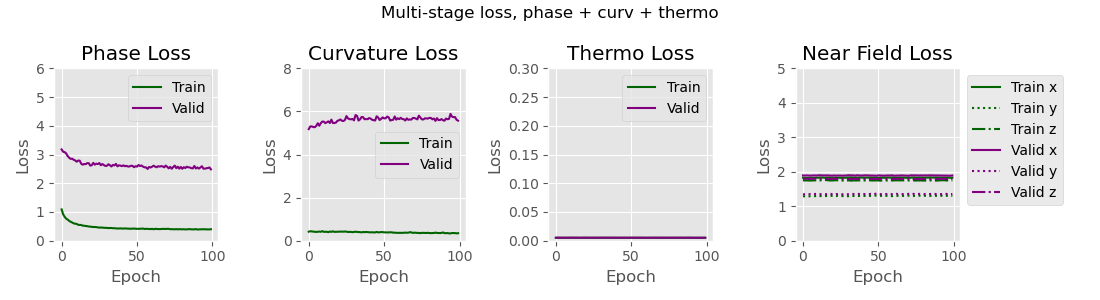

In [3]:
# first phase only, then der only, then recon + thermo, then phase + der + thermo
exp_name = "000"

folder_path = os.path.join(path_results, exp_name)
res_0 = eval.gather_loss(folder_path + "_0")
res_1 = eval.gather_loss(folder_path + "_1")
res_2 = eval.gather_loss(folder_path + "_2")
res_3 = eval.gather_loss(folder_path + "_3")

plt.close("all")
eval.plot_loss(res_0['loss'], res_0['loss'], res_0['loss'], res_0['loss'], title="phase only", save_fig=True)
eval.plot_loss(res_1['loss'], res_1['loss'], res_1['loss'], res_1['loss'], title="curv only", save_fig=True)
eval.plot_loss(res_2['loss'], res_2['loss'], res_2['loss'], res_2['loss'], title="recon + thermo", save_fig=True)
eval.plot_loss(res_3['loss'], res_3['loss'], res_3['loss'], res_3['loss'], title="phase + curv + thermo", save_fig=True)

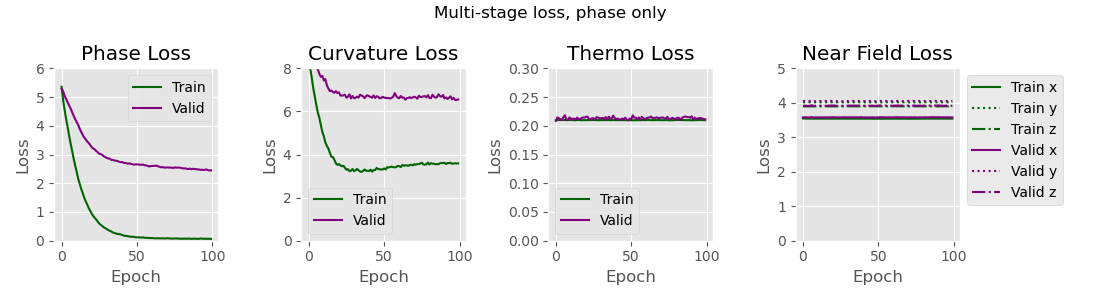

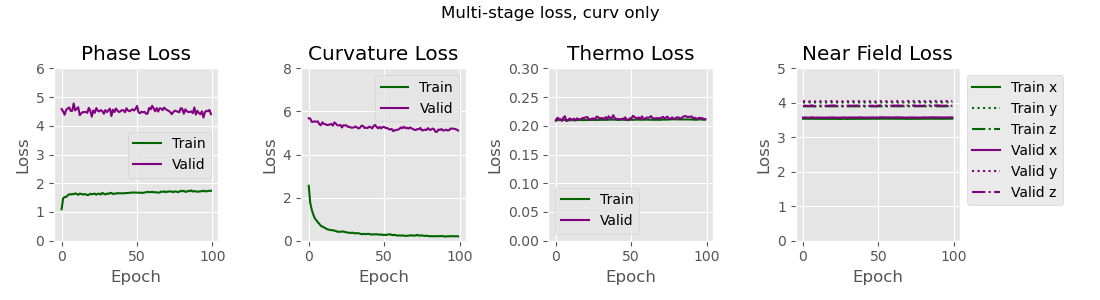

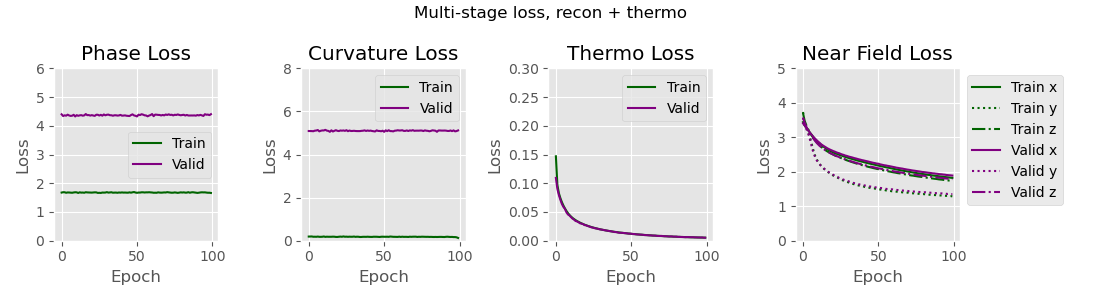

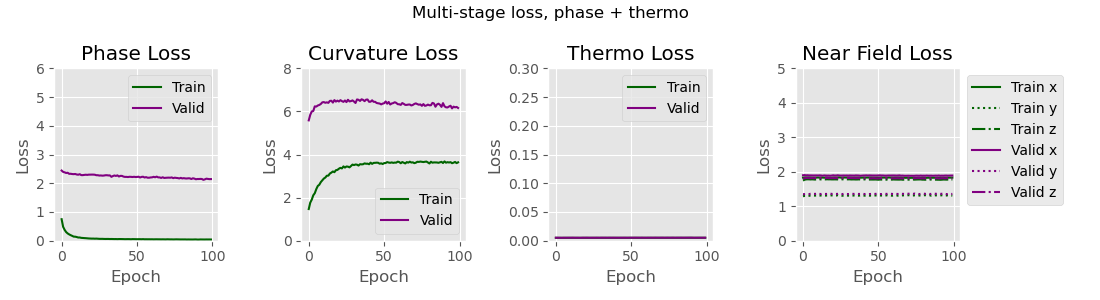

In [2]:
exp_name = "001"

folder_path = os.path.join(path_results, exp_name)
res_0 = eval.gather_loss(folder_path + "_0")
res_1 = eval.gather_loss(folder_path + "_1")
res_2 = eval.gather_loss(folder_path + "_2")
res_3 = eval.gather_loss(folder_path + "_3")

plt.close("all")
eval.plot_loss(res_0['loss'], res_0['loss'], res_0['loss'], res_0['loss'], title="phase only", save_fig=False)
eval.plot_loss(res_1['loss'], res_1['loss'], res_1['loss'], res_1['loss'], title="curv only", save_fig=False)
eval.plot_loss(res_2['loss'], res_2['loss'], res_2['loss'], res_2['loss'], title="recon + thermo", save_fig=False)
eval.plot_loss(res_3['loss'], res_3['loss'], res_3['loss'], res_3['loss'], title="phase + thermo", save_fig=False)

## 2. Evaluate other metrics

In [ ]:
phase_folder = os.path.join(path_results, exp_name + "_0")
phase_train_results, phase_valid_results = eval.get_results(phase_folder, "encoder.pkl")

plt.close("all")

In [3]:
phase_folder = os.path.join(path_results, exp_name + "_0")
phase_train_results, phase_valid_results = eval.get_results(phase_folder, "encoder.pkl")

der_folder = os.path.join(path_results, exp_name + "_1")
der_train_results, der_valid_results = eval.get_results(der_folder, "encoder.pkl")

recon_folder = os.path.join(path_results, exp_name + "_2")
recon_train_results, recon_valid_results = eval.get_results(recon_folder, "recon.pkl")

resim_train_results, resim_valid_results = eval.get_results(recon_folder, "resim.pkl")

plt.close("all")

eval.get_regression_plots(phase_train_results, phase_valid_results, der_train_results, der_valid_results, title = "Encoder", save_fig=False)

FileNotFoundError: [Errno 2] No such file or directory: '/develop/results/spie_journal_2023/000_0/train_info/encoder.pkl'

In [ ]:
recon_train_results['nf_amp_diff'].shape
print(recon_train_results['nf_amp_diff'][80][50][50])
print(recon_valid_results['nf_amp_diff'][80][50][50])

In [ ]:
plt.close("all")

eval.violin_plots(recon_train_results['nf_amp_diff'], recon_train_results['nf_angle_diff'], 
             'Train Dataset', savefig=False)
eval.violin_plots(recon_valid_results['nf_amp_diff'], recon_valid_results['nf_angle_diff'],  
             'Valid Dataset', savefig=False)

In [ ]:
##### get near field truth, recon, and resim values ####

nf_truth_train = resim_train_results['nf_truth']
nf_truth_valid = resim_valid_results['nf_truth']

nf_recon_train = resim_train_results['nf_pred']
nf_recon_valid = resim_valid_results['nf_pred']
import pickle
def get_nf_resim(folder_name, target):
    
    folder_path = os.path.join(folder_name, target + "_info")
    nf_resim = []
    for file in os.listdir(folder_path):
        print(file)
        if "sample" in file:
            resim = pickle.load(open(os.path.join(folder_path,file),"rb"))
            nf_resim.append(resim['near_fields_1550']['ey'])
    return nf_resim

folder_name = os.path.join(path_results, exp_name + "_2")
nf_resim_train = get_nf_resim(folder_name, target = 'train')
nf_resim_valid = get_nf_resim(folder_name, target = 'valid')

In [ ]:
nf_resim_valid

In [ ]:
plt.close("all")

similarity = True
amplitude_matrix, phase_matrix = em.build_custom_conf_matrices(nf_truth_train, nf_recon_train, 
                                                             nf_resim_train, similarity = similarity, savefig=True)
em.plot_custom_confusion_matrix(amplitude_matrix, phase_matrix, similarity=similarity, savefig=True)

In [ ]:
plt.close("all")

similarity = False
amplitude_matrix, phase_matrix = em.build_custom_conf_matrices(nf_truth_train, nf_recon_train, 
                                                             nf_resim_train, similarity = similarity)
em.plot_custom_confusion_matrix(amplitude_matrix, phase_matrix, similarity=similarity, savefig=True)

In [ ]:
plt.close("all")       
em.plot_dft_fields(nf_truth_train, nf_recon_train, nf_resim_train, 
           target = "Near Field, Train Dataset", batch=True, savefig = True)

In [ ]:
plt.close("all")
em.plot_dft_fields(nf_truth_valid, nf_recon_valid, nf_resim_valid, "Near Field, Valid Dataset", batch=True, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_train, ff_recon_train, ff_resim_train, "Far Field, Train Dataset", batch=True, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_valid, ff_recon_valid, ff_resim_valid, "Far Field, Valid Dataset", batch=True, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(nf_truth_train, nf_recon_train, nf_resim_train, "Near Field, Train Dataset", batch=False, idx=0, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(nf_truth_valid, nf_recon_valid, nf_resim_valid, "Near Field, Valid Dataset", batch=False, idx=6, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_train, ff_recon_train, ff_resim_train, "Far Field, Train Dataset", batch=False, idx=0, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_valid, ff_recon_valid, ff_resim_valid, "Far Field, Valid Dataset", batch=False, idx=0, savefig=True)